In [1146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path = "~/Downloads/titanic/"
train_df = pd.read_csv(path + "train.csv")
test_df = pd.read_csv(path + "test.csv")
out = pd.DataFrame(test_df["PassengerId"])

In [1147]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [1148]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1149]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1150]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Analyze by pivoting features

In [1151]:
train_df[['Pclass', 'Survived']].groupby(["Pclass"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Most people in 1st class survived. As you decrease in class rank, so did your chance of surviving.

In [1152]:
train_df[['Sex', 'Survived']].groupby(["Sex"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Most women survived

In [1153]:
train_df[['Parch', 'Survived']].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Those who had 3 parents/children on board were more likely to survive

In [1154]:
train_df[["SibSp", "Survived"]].groupby(["SibSp"]).mean().sort_values("Survived", ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


Those who had no sibling or spouse were less likely to survive when compared to those who has 1 or 2 siblings/spouse onboard

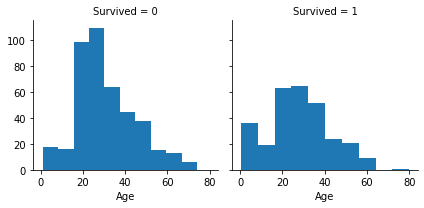

In [1155]:
sns.FacetGrid(train_df,col="Survived").map(plt.hist, 'Age', bins=10)

Those who were middle aged had a greater chance of surviving. So, after this analysis, we can conclude that age, SibSp, Parch, Sex, and Pclass are all features we want to include in our final model. I also predict that those who paid a higher fare were more likely to survive (TODO: visualize fare vs survival). 

## Data Cleaning

In [1156]:
columns_to_drop = ["PassengerId", "Cabin", "Ticket"]
train_df = train_df.drop(columns_to_drop, axis=1)
test_df = test_df.drop(columns_to_drop, axis=1)
combined_df = [train_df, test_df]

Another step we can take in our data cleaning process is to perform feature engineering. That is, we can create new features by extracting information from our pre-existing features. In this case, we can create a new feature called 'Title' to test whether social title (Master, Mr, Mrs,) is correlated with survival.

In [1157]:
for dataset in combined_df:
    dataset["Title"] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df["Title"], train_df["Survived"])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


We can observe here that the majority of those with female titles survived, wheras those with male titles were much more likely to die. We can also combine many of the similar titles together to make it analysis simpler.

In [1158]:
for df in combined_df:
    df["Title"] = df["Title"].replace(["Capt", "Col", "Countess", "Don", "Dr", "Jonkheer", "Major", "Rev", "Sir"], "Rare")
    df["Title"] = df["Title"].replace(["Lady", "Mme", "Ms", "Mlle"], "Miss")

In [1159]:
train_df[["Title", "Survived"]].groupby(["Title"], as_index=False).mean().sort_values("Survived", ascending=False)

,Title,Survived
3,Mrs,0.792000
1,Miss,0.705882
0,Master,0.575000
4,Rare,0.318182
2,Mr,0.156673


In [1160]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for df in combined_df:
    df["Title"] = df["Title"].map(title_mapping)

Here, we convert our extracted titles to ordinal scale so that it can be used in our model. Then, we can safely drop our Name feature since we took the most useful bit of information from the Name feature and created it as a new feature.

In [1161]:
train_df = train_df.drop(["Name"], axis=1)
test_df = test_df.drop(["Name"], axis=1)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [1162]:
gender_mapping = {"male": 1, "female":0}
train_df["Sex"] = train_df["Sex"].map(gender_mapping).astype(int)
test_df["Sex"] = test_df["Sex"].map(gender_mapping).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,3
2,1,3,0,26.0,0,0,7.9250,S,2
3,1,1,0,35.0,1,0,53.1000,S,3
4,0,3,1,35.0,0,0,8.0500,S,1


Convert the gender feature to a nominal value

### Completing numerical continuous features

We must complete features that have missing values in order to feed in as many samples to our models. 

In [1163]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

We are missing 177 values for the Age feature. We can fill that in by correlating the features of Gender and Pclass to to guess the age values across different pclasses and genders.

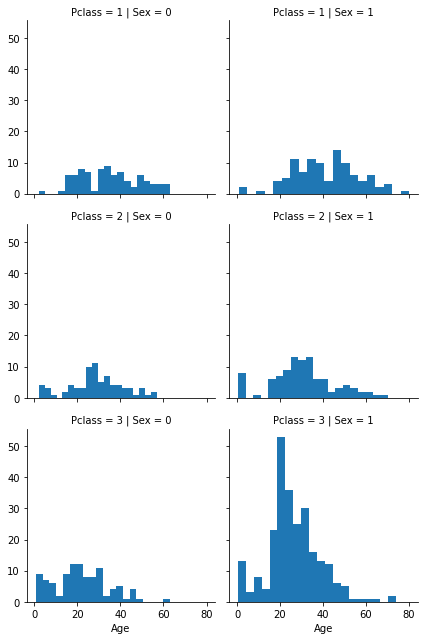

In [1164]:
sns.FacetGrid(train_df, row='Pclass', col='Sex').map(plt.hist, 'Age', bins=20)

In [1165]:
guess_ages = np.zeros((2,3))
for df in [train_df, test_df]:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = df[(df["Sex"] == i) & (df['Pclass'] == j+1)]["Age"].dropna()
            age_guess_for_class = guess_df.median()
            guess_ages[i][j] = age_guess_for_class
    
    for i in range(0,2):
        for j in range(0,3):
            df.loc[(df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1), "Age"] = guess_ages[i,j]

    df["Age"] = df["Age"].astype(int)

Get the median age for each passenger class and sex, and fill in the missing values in the datasets with the relevant median age.

In [1166]:
train_df["Age Band"] = pd.cut(train_df["Age"], 5)
train_df[["Age Band", "Survived"]].groupby(["Age Band"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Age Band,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.412037
1,"(16.0, 32.0]",0.337374
4,"(64.0, 80.0]",0.090909


In [1167]:
for df in [train_df, test_df]:
    df.loc[df["Age"] <= 16, 'Age'] = 0
    df.loc[(df["Age"] > 16) & (df["Age"] < 32), "Age"] = 1
    df.loc[(df["Age"] > 32) & (df["Age"] < 48), "Age"] = 2
    df.loc[(df["Age"] > 48) & (df["Age"] < 64), "Age"] = 3
    df.loc[(df["Age"] > 64) & (df["Age"] < 80), "Age"] = 4

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age Band
0,0,3,1,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,S,1,"(32.0, 48.0]"


After filling in all our ages, we create a temporary feature ("Age Band"), in order to convert age from a continous feature to a categorical feature

In [1168]:
train_df = train_df.drop(["Age Band"], axis=1)
combined = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,7.2500,S,1
1,1,1,0,2,1,0,71.2833,C,3
2,1,3,0,1,0,0,7.9250,S,2
3,1,1,0,2,1,0,53.1000,S,3
4,0,3,1,2,0,0,8.0500,S,1


In [1169]:
for df in combined:
    df["FamilySize"] = df["Parch"] + df["SibSp"] + 1

train_df[["FamilySize", "Survived"]].groupby("FamilySize", as_index=False).mean().sort_values(by="Survived", ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Seeing that, for the most prt, those who were not alone had a greater chance of surviving than those who were alone, we can engineer a new feature 'isAlone' and then drop the Family Size, SibSp, and Parch features

In [1170]:
for df in combined:
    df["isAlone"] = 0
    df.loc[df["FamilySize"] == 1, 'isAlone'] = 1

In [1171]:
train_df = train_df.drop(["FamilySize", "SibSp", "Parch"], axis=1)
test_df = test_df.drop(["FamilySize", "SibSp", "Parch"], axis=1)
combined = [train_df, test_df]

In [1172]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,1,1,7.2500,S,1,0
1,1,1,0,2,71.2833,C,3,0
2,1,3,0,1,7.9250,S,2,1
3,1,1,0,2,53.1000,S,3,0
4,0,3,1,2,8.0500,S,1,1


In [1173]:
train_df[["Embarked", "Survived"]].groupby("Embarked").mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Embarked is a nominal categorical feature  that we want to convert to an ordinal feature. Based on observations, those who embarked from port C has a greater chance of survival than Port Q, and those who embarked from port Q had a greater chance of survival than those departing from port S. Before we convert to an ordinal scale, we drop the two samples from our training df that are missing their embarked port (we can also use the mode of Embarked to fill it in?)

In [1174]:
train_df = train_df.dropna()

In [1175]:
embarked_mapping = {"C": 1, "Q": 2, "S": 3}
train_df["Embarked"] = train_df["Embarked"].map(embarked_mapping).astype(int)
test_df["Embarked"] = test_df["Embarked"].map(embarked_mapping).astype(int)

train_df.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,1,1,7.2500,3,1,0
1,1,1,0,2,71.2833,1,3,0
2,1,3,0,1,7.9250,3,2,1
3,1,1,0,2,53.1000,3,3,0
4,0,3,1,2,8.0500,3,1,1


The last feature that we want to convert from a continious scale to categorical feature is the Fare feature. Note that we have two null values in our test dataset, and so we will fill that in with the median of the Fare feature, and the median for the Title feature. (Why the median and not the mean?)

In [1176]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        1
Embarked    0
Title       1
isAlone     0
dtype: int64

In [1177]:
test_df["Fare"].fillna(test_df["Fare"].dropna().median(), inplace=True)
test_df["Title"].fillna(test_df["Title"].dropna().median(), inplace=True)
test_df.isna().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
isAlone     0
dtype: int64

In [1178]:
train_df["FareBand"] = pd.cut(train_df["Fare"], 10)
train_df[["FareBand", "Survived"]].groupby(["FareBand"], as_index=False).mean().sort_values(by="Survived", ascending=False)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,FareBand,Survived
3,"(153.699, 204.932]",1.000000
9,"(461.096, 512.329]",1.000000
2,"(102.466, 153.699]",0.741935
5,"(256.165, 307.398]",0.666667
1,"(51.233, 102.466]",0.653846
4,"(204.932, 256.165]",0.636364
0,"(-0.512, 51.233]",0.318306
6,"(307.398, 358.63]",NaN
7,"(358.63, 409.863]",NaN
8,"(409.863, 461.096]",NaN


We can observe that those who paid high prices for their tickets were very likely to survive, wheras those who bought the cheapest tickets were the least likely to survive

In [1179]:
for df in [train_df, test_df]:
    df.loc[df["Fare"] <= 52, "Fare"] = 1
    df.loc[(df["Fare"] > 52) & (df["Fare"] < 103), "Fare"] = 2
    df.loc[(df["Fare"] > 103) & (df["Fare"] < 153.7), "Fare"] = 3
    df.loc[(df["Fare"] > 153.7) & (df["Fare"] < 205), "Fare"] = 4
    df.loc[(df["Fare"] > 205) & (df["Fare"] < 257), "Fare"] = 5
    df.loc[(df["Fare"] > 257) & (df["Fare"] < 308), "Fare"] = 6
    df.loc[(df["Fare"] > 308), "Fare"] = 7
    
train_df["Fare"] = train_df["Fare"].astype(int)
test_df["Fare"] = test_df["Fare"].astype(int)
train_df = train_df.drop("FareBand", axis=1)

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [1180]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,1,1,1,3,1,0
1,1,1,0,2,2,1,3,0
2,1,3,0,1,1,3,2,1
3,1,1,0,2,2,3,3,0
4,0,3,1,2,1,3,1,1


In [1181]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,3,1,2,1,2,1.0,1
1,3,0,2,1,3,3.0,0
2,2,1,3,1,2,1.0,1
3,3,1,1,1,3,1.0,1
4,3,0,1,1,3,3.0,0


We're done analyzing all of our features and converting them to scales that will be most useful to our model. Now we can start building our model !

## Building Our Model

Classification problems like these can use models such as
 - Logistic Regression
 - K nearest neighbors
 - Support vector machine
 - Naive Bayes classifier
 - Decision trees


In [1182]:
from sklearn.model_selection import train_test_split
X = train_df.drop(columns=["Survived"], axis=1)
y = train_df["Survived"]

In [1183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [1184]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression().fit(X=X_train, y=y_train)
logmodel.score(X_test, y_test)

0.8089887640449438

In [1185]:
from sklearn import tree

treemodel = tree.DecisionTreeClassifier().fit(X_train, y_train)
treemodel.score(X_test, y_test)

0.848314606741573

In [1186]:
correlation_df = pd.DataFrame(train_df.columns.delete(0))
correlation_df.columns = ["Feature"]
correlation_df["Coefficient"] = pd.Series(logmodel.coef_[0])
correlation_df.sort_values(by="Coefficient")

,Feature,Coefficient
1,Sex,-2.172661
0,Pclass,-0.865634
4,Embarked,-0.201253
2,Age,0.015028
6,isAlone,0.033419
3,Fare,0.079602
5,Title,0.364659


In [1187]:
test_df_pred = treemodel.predict(test_df)
out["Survived"] = test_df_pred

In [1188]:
out.to_csv(path + "/submission3.csv", index=False)

Using the decision tree model and our final set of features, we were able to achieve ~80% accuracy on the test dataset